In [3]:
import numpy as np

In [5]:
vvi = np.load('opt_v_table_vi.npy')
vpi = np.load('opt_v_table_pi.npy')
qvi = np.load('opt_q_table_vi.npy')
qpi = np.load('opt_q_table_pi.npy')
pvi = np.load('opt_policy_vi.npy')
ppi = np.load('opt_policy_pi.npy')

In [6]:
choice_vi=np.zeros((20, 6))
for p in range(19, 0, -1):
    for v in range(6):
        choice_vi[p][v] = int(np.argmax(qvi[p][v]))

choice_pi=np.zeros((20, 6))
for p in range(20):
    for v in range(6):
        choice_pi[p][v] = int(np.argmax(qpi[p][v]))

In [7]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.9f}".format(x)})

diffv = vvi - vpi
print(diffv)

diffp = pvi - ppi
print(diffp)

diffq = qvi - qpi
print(diffq)
# (vvi == vpi).all()

[[0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000]
 [0.000000000 0.000000000

C:\Users\simon.chauvin\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in subtract


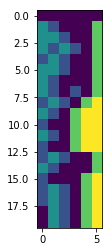

In [8]:
import matplotlib.pyplot as plt
plt.imshow(vvi)
plt.imshow(choice_vi)
plt.show()

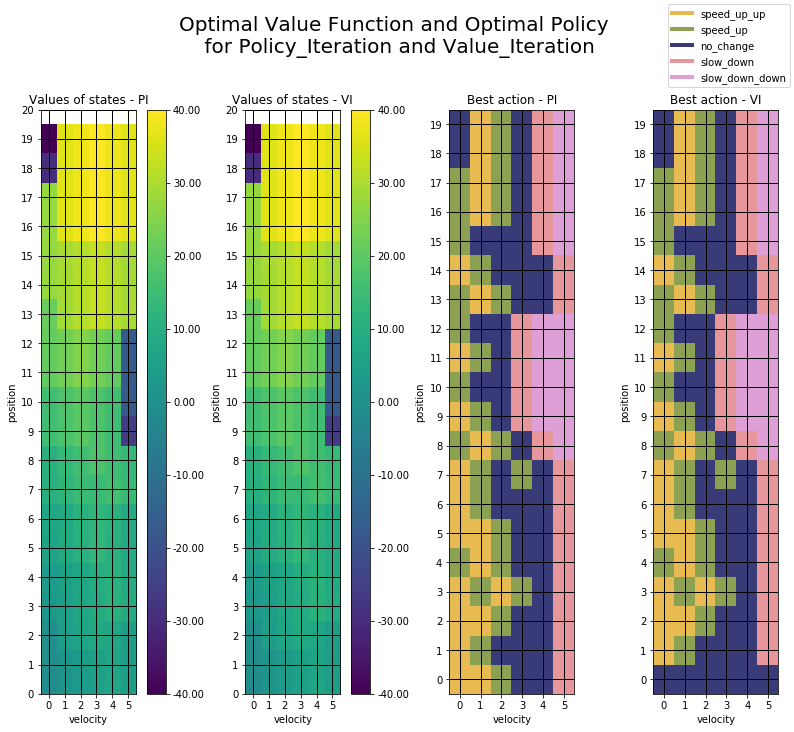

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(11,10))
fig.suptitle('Optimal Value Function and Optimal Policy \n for Policy_Iteration and Value_Iteration', fontsize=20)
cmap = plt.cm.viridis

# Values
ax1.set_title('Values of states - PI')
im1 = ax1.imshow(vpi, aspect='auto', cmap=cmap)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="20%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, ticks=MultipleLocator(10), format="%.2f")
ax1.set_ylim(0,20)

ax2.set_title('Values of states - VI')
im2 = ax2.imshow(vvi, aspect='auto', cmap=cmap)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="20%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, ticks=MultipleLocator(10), format="%.2f")
ax2.set_ylim(0,20)

cmap = plt.cm.tab20b

# Policies
ax3.set_title('Best action - PI')
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im3 = ax3.imshow(choice_pi, origin='lower', cmap=cmap, aspect='auto')
# Create divider for existing axes instance
# divider3 = make_axes_locatable(ax3)
# Append axes to the right of ax3, with 20% width of ax3
# cax3 = divider3.append_axes("right", size="20%", pad=0.15)
# Create colorbar in the appended axes
# Tick locations can be set with the kwarg `ticks`
# and the format of the ticklabels with kwarg `format`
# cbar3 = plt.colorbar(im3, cax=cax3, ticks=MultipleLocator(1), format="%.2f")

ax4.set_title('Best action - VI')
im4 = ax4.imshow(choice_vi, origin='lower', cmap=cmap, aspect='auto')
# divider4 = make_axes_locatable(ax4)
# cax4 = divider4.append_axes("right", size="20%", pad=0.15)
# cbar4 = plt.colorbar(im4, cax=cax4, ticks=MultipleLocator(1), format="%.2f")


plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)

for axis in [ax1, ax2, ax3, ax4]:
    axis.set_xlabel('velocity')
    axis.set_ylabel('position')
    axis.grid(color='k', linestyle='-', linewidth=1)
    axis.yaxis.set_major_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(1))

# legend
custom_lines = [Line2D([0], [0], color=cmap(0.5), lw=4),
                Line2D([0], [0], color=cmap(0.25), lw=4),
                Line2D([0], [0], color=cmap(0), lw=4),
                Line2D([0], [0], color=cmap(0.75), lw=4),
                Line2D([0], [0], color=cmap(1.0), lw=4)
               ]

actions_list = ["speed_up_up", "speed_up", "no_change", "slow_down", "slow_down_down"]
fig.legend(custom_lines, actions_list)

plt.savefig("map_values_policies.png", dpi=1000)
# plt.savefig('map_values_policies.eps', format='eps', dpi=1000)

plt.show()